In [14]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

from SparseStochMat import sparse_autocov_mat
import auxiliary_functions

In [15]:
net_rw = ContTempNetwork.load('fig3_growing_network300')

In [16]:
selected_lamdas = np.logspace(-3,1,10)
time = net_rw.times
windows = [100, 500, 1000, 2500, 5000]

In [26]:
time[-1]

299.8905950166158

In [32]:
len(time)

18596

In [31]:
window_S_selected

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]

ValueError: x and y must have same first dimension, but have shapes (18495,) and (0,)

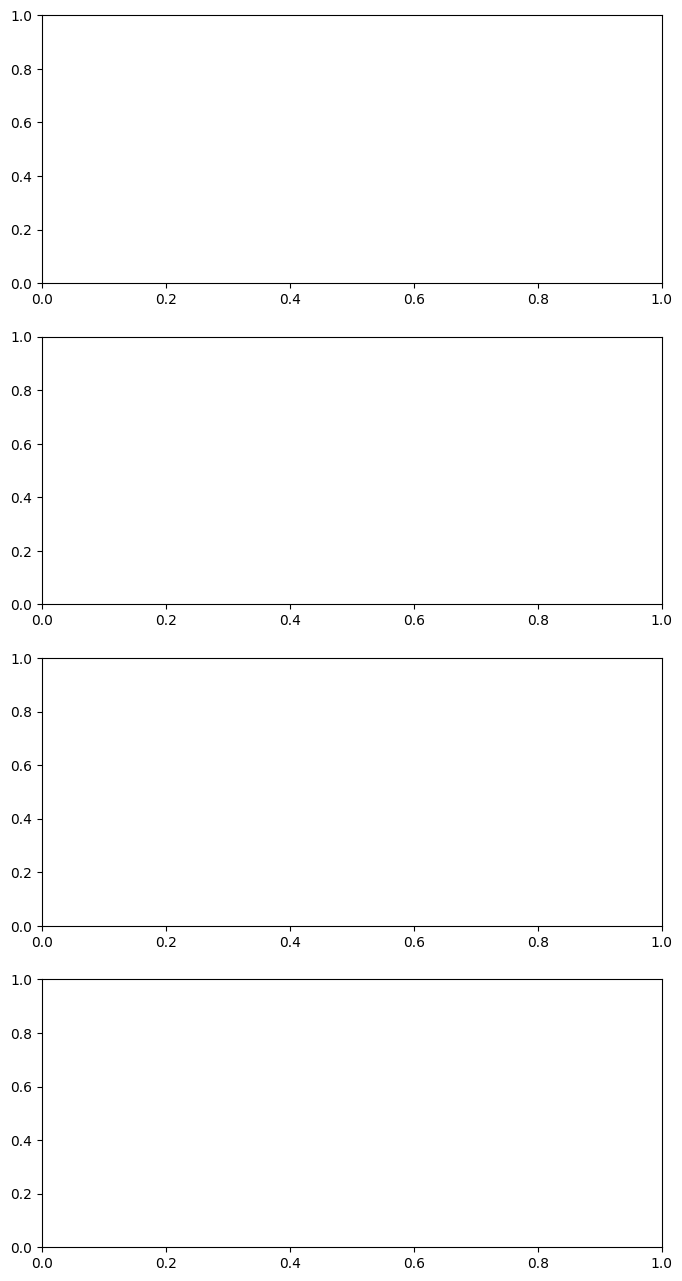

In [30]:
#Plot 5
list_colors = ['orange', 'coral', 'salmon', 'plum', 'orchid', 'purple', 'brown', 'olive', 'green', 'lightseagreen']
fig, ax = plt.subplots(4,1, figsize = (8, 16))
for j, window in enumerate(windows[0:1]):
    window_S_selected = []
    for i, lamda in enumerate(selected_lamdas):
        with open(f'//scratch/tmp/180/skoove/growing_experiment300_temporal_rw/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    
    for i, lamda in enumerate(selected_lamdas):
        S = window_S_selected[i]
        ax[j].plot(time[(window // 2)+1 : -(window // 2)], S[1:-window], color = list_colors[i], alpha = 0.30, label='lamda = ' + f'{lamda:.11f}')
        ax[j].set_xlabel('t')

    ax[j].legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))
    ax[j].set_title(f'Rolling Conditional entropy - window length {window}')
plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/primary_school/conditionalH_shaded.png', format='png', dpi=300, bbox_inches='tight')
plt.show()